# Let's estimate

A slightly different take on the sample mean $\sigma_{\bar x}$ and the central limit theorem (CTL).

Say, we have a population and draw a sample of size $n$ from it. Then we try to guess - or estimate - the population mean based on our sample. For example, our sample is ($1$, $2$, $1$, $6$, $4$, $4$). What do you think the population mean $\mu$ is?

The obvious choice is the sample mean $\bar x$, right?
[Remark: If there are no other sources of error, $\bar x$ is indeed the best choice. But in case of noisy data with  outliers, the median or the mean after removing outliers may be better estimates.]

Then we test our guess by simulation: We draw many samples of size $n$ from a population and compare the known population mean with the many sample means we get. In fact, we get a distribution of sample means. We can make a histogram, compute the mean of our sample means, and check under which conditions the prediction of the population mean is good.

That was an essential paragraph. Reread until you understand it.

We will again implement our "population" using the 
[scipy](https://docs.scipy.org/doc/scipy-0.16.1/reference/stats.html) package. We shall use uniform and normal RVs, but you can use many others. 

In [1]:
import scipy.stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Define a population

* uniform RV: `rv=scipy.stats.uniform`
* normal RV: `rv=scipy.stats.norm`
* Student t RV: `rv=scipy.stats.t`

In [2]:
rv=scipy.stats.uniform

Now that we have `rv`, we can use its 'methods'. 

* In the last notebook we used the PDF: `rv.pdf(x)`
* The syntax to take a sample of size $5$ is `rv.rvs(size=5)`

In [5]:
sample=rv.rvs(size=5)
sample

array([0.74830054, 0.39283031, 0.77849496, 0.35289225, 0.03625108])

The sample is returned as a `numpy` array. Let's convert it into a `pandas` data-frame, and compute mean and median.

In [6]:
df=pd.DataFrame({'x':sample})
df['x'].mean(), df['x'].median()

(0.4617538264676906, 0.3928303081081822)

## Task

The two cells above draw a random sample of size $5$ from a standard uniform distribution. The numbers and their mean and median will be different every time you run the notebook anew.

Is your sample mean close to the population mean, that is, close to the expected value of a standard uniform distribution?

## Simulation

Now we perform a numerical experiment. We 
* Draw $1,000$ samples of size $n$.
* Compute the mean of each sample. 
* Plot a histogram of the sample means to see their distribution.
* Compute the mean of the sample means, $\mu_{\bar x}$, to test whether it approaches the population mean $\mu$.

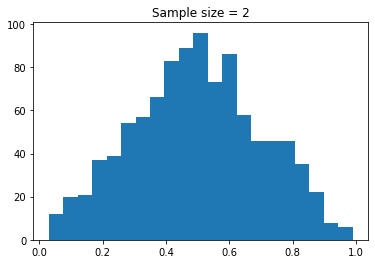

mu_xbar = 0.49844580118026355


In [7]:
n=2
n_samples=1000
means=np.zeros(n_samples)  # a numpy array to collect means

for i in range(n_samples):
    sample=rv.rvs(size=n)
    df=pd.DataFrame({'x':sample})
    means[i] = df['x'].mean()

p=plt.hist(means, bins=21)
plt.title(f'Sample size = {n}')
plt.show()
print(f'mu_xbar = {means.mean()}')

Okay, so what this plot tells us is that for $n=2$ the distribution of sample means peaks around the population mean $0.5$, but that it is pretty broad: Anything between $0$ and $1$ is in the cards.

Yet, the mean of the sample means if very close to actual population mean.

Now the CTL says that as I increase $n$ the distribution gets increasingly narrow and at the same time increasingly "normal", that is, shaped like a normal distribution.

## Tasks

1. Increase $n$ to 4, 8, 16, 32, 64, and 128. Observe the shape and the scale of the $x$ axis. What happens?

2. Restart the notebook, and instead of a uniform RV, use a normal RV to draw random samples. What changes?

### Estimating the variance

Estimator 1     $~~~s^2_n = \sum_i (x_i - \mu)^2 / n~~~$ ("Variance of the sample.") 

Estimator 2     $~~~s^2 = s^2_{n-1} = \sum_i (x_i - \mu)^2 / (n-1)~~~$ ("Sample variance.")

In [6]:
def variances(sample):
    """ 
    sample is a np.array
    compute two estimators for the population variance:
    s2_n = sum(x-mean)^2 / n and s2_n1 = sum(x-mean)^2 / (n-1)  
    """
    squares=(sample - sample.mean())**2
    sum_sqs=np.sum(squares)
    n = len(sample)
    return sum_sqs/n, sum_sqs/(n-1)

In [7]:
sample=rv.rvs(size=6)
variances(sample)

(1.6283040718891042, 1.953964886266925)

In [8]:
df=pd.DataFrame({'x':sample})
df['x'].var(ddof=1)

1.953964886266925

In [12]:
n=5
n_samples=10000
s2ns=np.zeros(n_samples)   # a numpy array to collect predictor 1
s2n1s=np.zeros(n_samples)  # a numpy array to collect predictor 2


for i in range(n_samples):
    sample=rv.rvs(size=n)
    s2ns[i], s2n1s[i] = variances(sample)

#p=plt.hist(s2ns, bins=51, cumulative=True, density=True)
#p=plt.hist(s2n1s, bins=51, cumulative=True, density=True)
#plt.title(f'Sample size = {n}')
#plt.xlim(0,1)
#plt.show()
print(f's2n = {s2ns.mean()}  s2n1 = {s2n1s.mean()}')

s2n = 0.8062706929754525  s2n1 = 1.0078383662193156
